# Welcome

**Today we are going to implement linear regression model from scratch without using sklearn or tensorflow libraries. All we need to implement it numpy and the math behind linear regression. It will be easy to understand and you will get better understanding about linear regression and how it is work.**

# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('/kaggle/input/focusing-on-mobile-app-or-website/Ecommerce Customers')

# Data preprocessing

In [3]:
print(' The shape of data is',data.shape)

 The shape of data is (500, 8)


In [4]:
data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [6]:
data.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [7]:
print(' Is there any missing values?',data.isnull().sum().any())
print(' Is there any duplicated values?',data.duplicated().sum().any())

 Is there any missing values? False
 Is there any duplicated values? False


**Converting str values to int values**

In [8]:
data['Email']=data['Email'].astype('category')
data['Address']=data['Address'].astype('category')
data['Avatar']=data['Avatar'].astype('category')

In [9]:
data['Email']=data['Email'].cat.codes
data['Address']=data['Address'].cat.codes
data['Avatar']=data['Avatar'].cat.codes

**Check if it is work**

In [10]:
data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,342,381,132,34.497268,12.655651,39.577668,4.082621,587.951054
1,190,226,25,31.926272,11.109461,37.268959,2.664034,392.204933
2,355,123,6,33.000915,11.330278,37.110597,4.104543,487.547505
3,391,62,114,34.305557,13.717514,36.721283,3.120179,581.852344
4,341,60,80,33.330673,12.795189,37.536653,4.446308,599.406092


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':' Yearly amount spent Distribution Plot'}, xlabel='Yearly Amount Spent', ylabel='Density'>

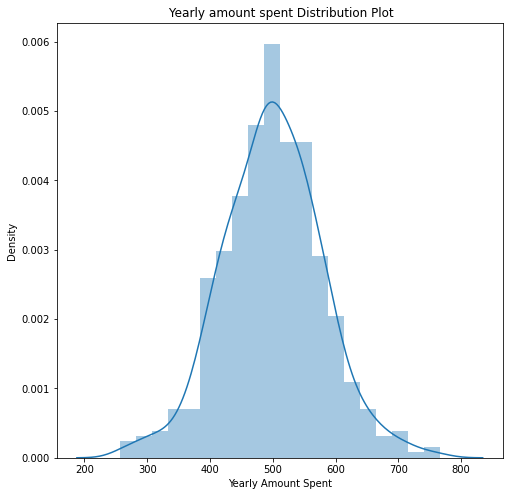

In [11]:
plt.figure(figsize=(8,8))

plt.title(' Yearly amount spent Distribution Plot')
sns.distplot(data['Yearly Amount Spent'])

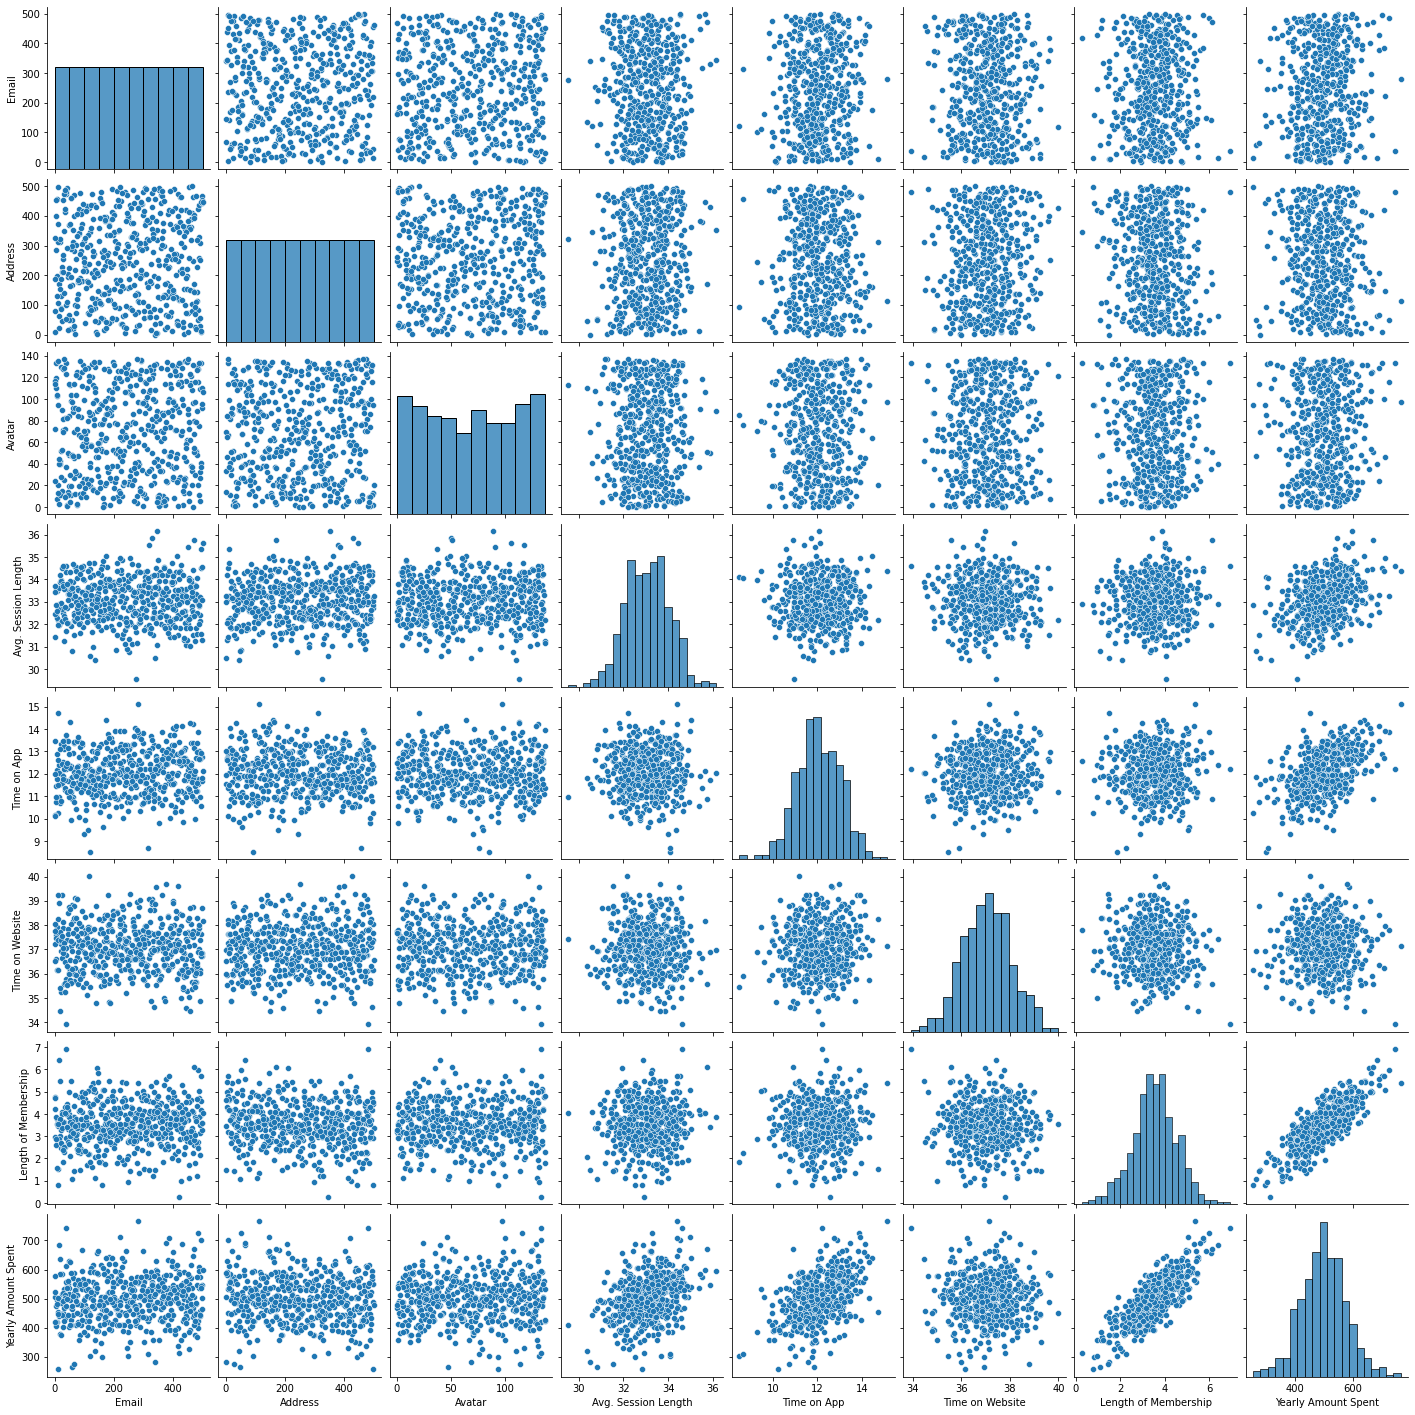

In [12]:
ax = sns.pairplot(data[data.columns])

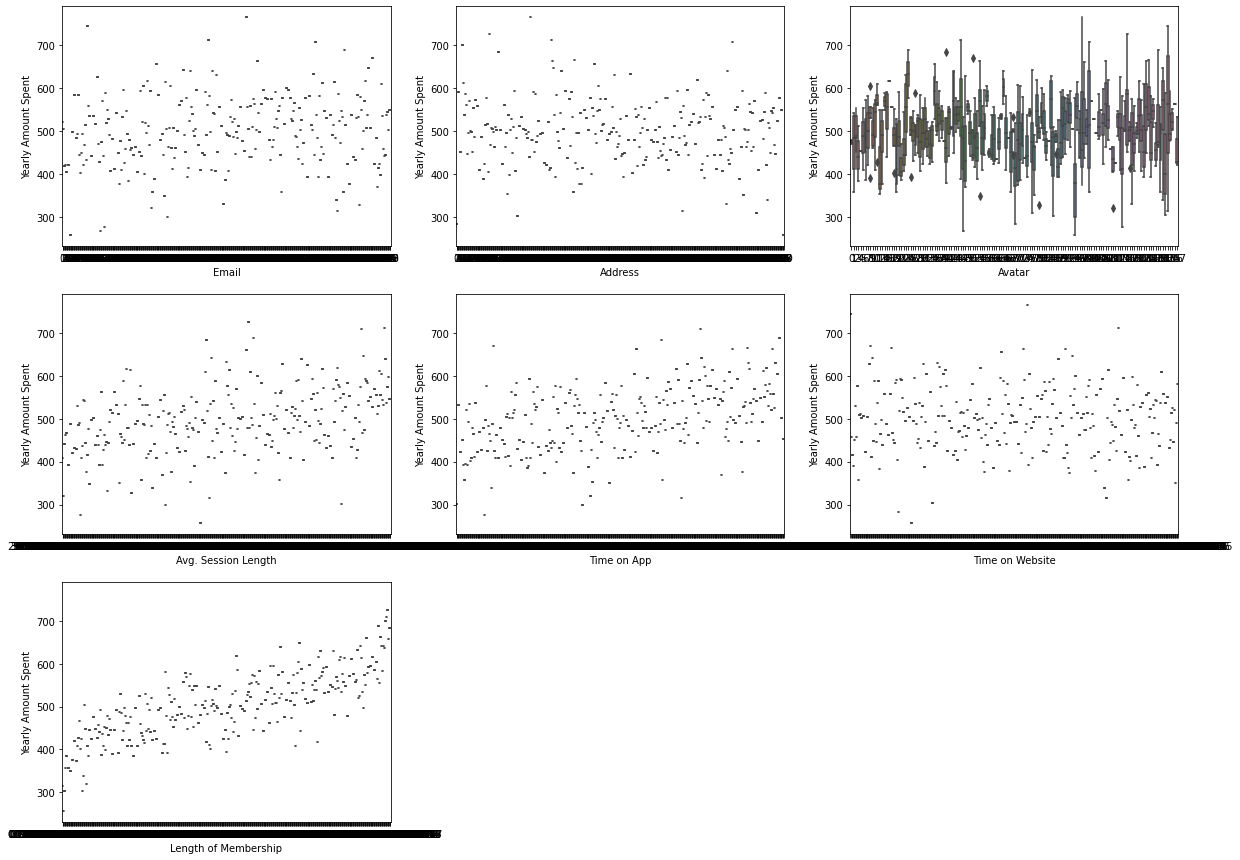

In [13]:
plt.figure(figsize=(20, 15))
plt.subplot(3,3,1)
sns.boxplot(x = 'Email', y = 'Yearly Amount Spent', data = data)
plt.subplot(3,3,2)
sns.boxplot(x = 'Address', y = 'Yearly Amount Spent', data = data)
plt.subplot(3,3,3)
sns.boxplot(x = 'Avatar', y = 'Yearly Amount Spent', data = data)
plt.subplot(3,3,4)
sns.boxplot(x = 'Avg. Session Length', y = 'Yearly Amount Spent', data = data)
plt.subplot(3,3,5)
sns.boxplot(x = 'Time on App', y = 'Yearly Amount Spent', data = data)
plt.subplot(3,3,6)
sns.boxplot(x = 'Time on Website', y = 'Yearly Amount Spent', data = data)
plt.subplot(3,3,7)
sns.boxplot(x = 'Length of Membership', y = 'Yearly Amount Spent', data = data)
plt.show()

**See the correlation and see which coulmn dosen not effect output**

In [14]:
correlation = data.corr()
round(correlation,2)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Email,1.00,0.00,0.06,-0.02,0.08,-0.03,0.05,0.07
Address,0.00,1.00,0.05,0.06,-0.01,0.05,-0.12,-0.08
Avatar,0.06,0.05,1.00,0.03,-0.02,0.00,0.01,0.02
Avg. Session Length,-0.02,0.06,0.03,1.00,-0.03,-0.03,0.06,0.36
Time on App,0.08,-0.01,-0.02,-0.03,1.00,0.08,0.03,0.50
Time on Website,-0.03,0.05,0.00,-0.03,0.08,1.00,-0.05,-0.00
Length of Membership,0.05,-0.12,0.01,0.06,0.03,-0.05,1.00,0.81
Yearly Amount Spent,0.07,-0.08,0.02,0.36,0.50,-0.00,0.81,1.00


**We need to draw it for better understanding**

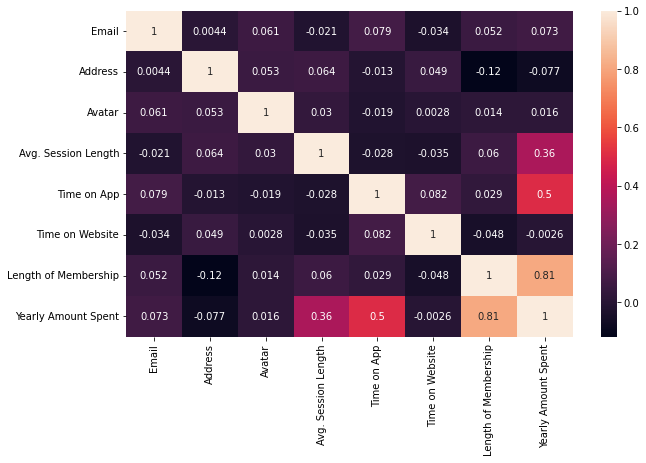

In [15]:
plt.figure(figsize=(10,6))
sns.heatmap(correlation,annot=True)
plt.show()

**So from heatmap we found that the three coulmns have a bad correlation, This means they will not affect the output. So we need to drop them**

In [16]:
data=data.drop(['Email','Address','Avatar'],axis=1)

In [17]:
data.columns

Index(['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

**Define Input and Output**

In [18]:
X=data.iloc[:,:-1] # X is the input
y=data.iloc[:,-1] # y is the output

In [19]:
X=np.array(X)
y=np.array(y)

**Data Scaling**

In [20]:
maximum_value=X.max()
X= X / maximum_value

**Data Spliting**

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [22]:
X_train=X_train.T
X_test=X_test.T

In [23]:
y_train=y_train.reshape(-1,1).T

In [24]:
y_test=y_test.reshape(-1,1).T

In [25]:
print('X_train shape is',X_train.shape)
print('X_test shape is',X_test.shape)
print('y_train shape is',y_train.shape)
print('y_test shape is',y_test.shape)

X_train shape is (4, 400)
X_test shape is (4, 100)
y_train shape is (1, 400)
y_test shape is (1, 100)


# Notations

**Multi linear regression function maps from `b` to `y` is represented as:**
**$$h_{(W,b)}(x) = b+W_{1}x_{1} + W_{2}x_{2}+W_{3}x_{3}+W_{4}x_{4}$$**
**So we need to define our parameters $(W_{n},b_{0})$**


**Cost function**

**$$J(\mathbf{W,b}) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (h_{(W,b)}(x) - y^{})^2$$**

**Gradient descent**

***
$$
\frac{\partial J(w,b)}{\partial b}^{}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} \ (f_{w,b}(X^{}) - y^{}) 
$$
$$
\frac{\partial J(w,b)}{\partial w}^{}  =  \frac{1}{m} \sum\limits_{i = 0}^{m-1}\ (f_{w,b}(X^{}) -y^{})X^{} 
$$

# model

In [26]:
def my_model(X, y, epochs,alpha):
    m= X_train.shape[1]
    n=X_train.shape[0]
    costs_list=[]
    
    W=np.zeros((n,1))
    b=0
    
    for  i in range(epochs):
        # hypothesis
        Z = np.dot(W.T,X) 
        
        # Cost function
        j = (1 / (2 * m)) * np.sum(np.square(Z - y)) 
        
        # Gradient descent
        dW = ( 1 / m) * np.sum((np.dot( ( Z - y) , X.T)))
        #db = ( 1 / m) * np.sum( Z - y)
        
        # Update weights
            
        W = W - alpha * dW.T 
        #b = b - alpha * db
        
        
        costs_list.append(j)
        if(i%(epochs / 10)==0):
             print('Cost after',i,'epochs is ', j)
    return W,b,costs_list

In [27]:
W,  b,costs_list=my_model(X_train,y_train,800000, 0.0000015)

Cost after 0 epochs is  126618.03852365058
Cost after 80000 epochs is  43690.05118643364
Cost after 160000 epochs is  16105.163869886655
Cost after 240000 epochs is  6929.419556059404
Cost after 320000 epochs is  3877.2307707082355
Cost after 400000 epochs is  2861.9609394222834
Cost after 480000 epochs is  2524.2449910292717
Cost after 560000 epochs is  2411.908291676654
Cost after 640000 epochs is  2374.5409891210106
Cost after 720000 epochs is  2362.1112550418366


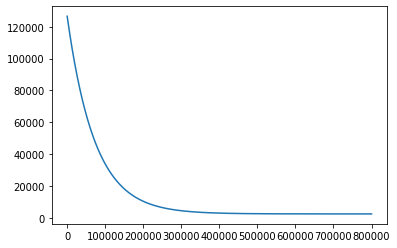

In [28]:
epochs = 800000
rng = np.arange(0, epochs)
plt.plot(rng,costs_list)
plt.show()